In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
%matplotlib inline
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [2]:
 
# Models from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor
 
# Model Evaluations
 
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
 
#%%

In [3]:
dsUSDEUR = pd.read_csv('One_Handled.csv')
# data2 = pd.read_csv('')

In [4]:
frames = [data1, data2]
dsUSDEUR = pd.concat(frames) 

In [4]:
#%%
dsUSDEUR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    200 non-null    object 
 1   Open    200 non-null    float64
 2   High    200 non-null    float64
 3   Low     200 non-null    float64
 4   Close   200 non-null    float64
 5   Volume  200 non-null    float64
 6   Day     200 non-null    int64  
 7   Month   200 non-null    int64  
 8   Year    200 non-null    int64  
 9   Hour    200 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
dsUSDEUR.head()
# tu bang thi ta co the nhan xet rang du lieu duoc lay sau moi 15 phut
 
#%%

,Time,Open,High,Low,Close,Volume,Day,Month,Year,Hour
0,01.01.2013 01:00:00.000,1.31975,1.32991,1.31570,1.31833,174395.5469,1,1,2013,1
1,02.01.2013 01:00:00.000,1.31836,1.31887,1.30222,1.30243,173935.4375,2,1,2013,1
2,03.01.2013 01:00:00.000,1.30240,1.30892,1.29971,1.30678,163991.1094,3,1,2013,1
3,04.01.2013 01:00:00.000,1.30678,1.30678,1.30678,1.30678,0.0000,4,1,2013,1
4,05.01.2013 01:00:00.000,1.30745,1.30792,1.30655,1.30676,4326.2202,5,1,2013,1


In [6]:
 # Missing values?
dsUSDEUR.isna().sum()


Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
Day       0
Month     0
Year      0
Hour      0
dtype: int64

In [7]:
# => du lieu cleaned 
test = dsUSDEUR 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    200 non-null    object 
 1   Open    200 non-null    float64
 2   High    200 non-null    float64
 3   Low     200 non-null    float64
 4   Close   200 non-null    float64
 5   Volume  200 non-null    float64
 6   Day     200 non-null    int64  
 7   Month   200 non-null    int64  
 8   Year    200 non-null    int64  
 9   Hour    200 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:>

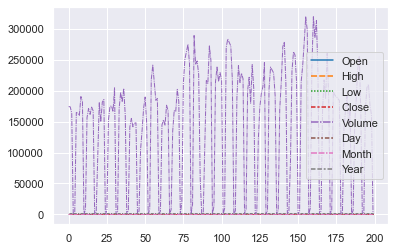

In [8]:
sns.set_theme(style="darkgrid")
testRate = test.drop(['Hour'], axis=1)
 
sns.lineplot(data=testRate, palette="tab10", linewidth=1)


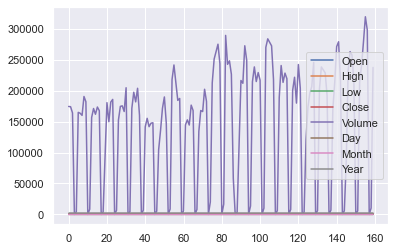

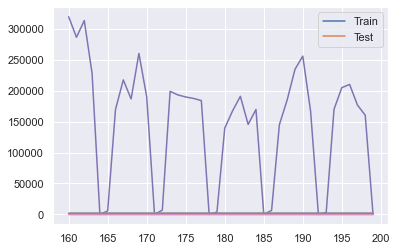

In [9]:
#%%
# testRate['Time'] = testRate['Time'].astype(int)
size = int(len(testRate)*0.80)
train_data = testRate[:size]
test_data = testRate[size:]

train_data.plot(legend=True)
test_data.plot(legend=True)
plt.legend(['Train', 'Test'])
plt.show()
 

In [27]:
## convert from String to datetime
import datetime
for x in testRate['Dates']:
    x = datetime.datetime.strptime(x, '%Y-%m-%d')
    
testRate['Dates'] = x
testRate['Dates']
# testRate['Dates'] = datetime.datetime.strptime(testRate['Dates'], '%Y/%m-%d')

0     2013-07-19
1     2013-07-19
2     2013-07-19
3     2013-07-19
4     2013-07-19
         ...    
195   2013-07-19
196   2013-07-19
197   2013-07-19
198   2013-07-19
199   2013-07-19
Name: Dates, Length: 200, dtype: datetime64[ns]

In [15]:
# check data
testRate['Dates'].str.split('.')
## Tach chuoi theo ngay thang nam 
testRate['Day'] = testRate['Dates'].str.split('.').str[0]
testRate['Month'] = testRate['Dates'].str.split('.').str[1]
testRate['Year'] = testRate['Dates'].str.split('.').str[2]

In [10]:
## noi kieu du lieu ngay gio lai voi nhau
for label, content in testRate.items():
    testRate['Dates'] = testRate['Year'].astype('string') + '-' + testRate['Month'].astype('string') + '-' + testRate['Day'].astype('string')   

In [11]:
testRate['Dates']

0       2013-1-1
1       2013-1-2
2       2013-1-3
3       2013-1-4
4       2013-1-5
         ...    
195    2013-7-15
196    2013-7-16
197    2013-7-17
198    2013-7-18
199    2013-7-19
Name: Dates, Length: 200, dtype: string

In [12]:
testRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    200 non-null    object 
 1   Open    200 non-null    float64
 2   High    200 non-null    float64
 3   Low     200 non-null    float64
 4   Close   200 non-null    float64
 5   Volume  200 non-null    float64
 6   Day     200 non-null    int64  
 7   Month   200 non-null    int64  
 8   Year    200 non-null    int64  
 9   Dates   200 non-null    string 
dtypes: float64(5), int64(3), object(1), string(1)
memory usage: 15.8+ KB


In [13]:
testRate.head()

,Time,Open,High,Low,Close,Volume,Day,Month,Year,Dates
0,01.01.2013 01:00:00.000,1.31975,1.32991,1.31570,1.31833,174395.5469,1,1,2013,2013-1-1
1,02.01.2013 01:00:00.000,1.31836,1.31887,1.30222,1.30243,173935.4375,2,1,2013,2013-1-2
2,03.01.2013 01:00:00.000,1.30240,1.30892,1.29971,1.30678,163991.1094,3,1,2013,2013-1-3
3,04.01.2013 01:00:00.000,1.30678,1.30678,1.30678,1.30678,0.0000,4,1,2013,2013-1-4
4,05.01.2013 01:00:00.000,1.30745,1.30792,1.30655,1.30676,4326.2202,5,1,2013,2013-1-5


In [14]:
testRate = test.drop(['Day','Month','Year', 'Hour'], axis=1)

In [17]:
testRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    200 non-null    datetime64[ns]
 1   Open    200 non-null    float64       
 2   High    200 non-null    float64       
 3   Low     200 non-null    float64       
 4   Close   200 non-null    float64       
 5   Volume  200 non-null    float64       
 6   Day     200 non-null    int64         
 7   Month   200 non-null    int64         
 8   Year    200 non-null    int64         
 9   Dates   200 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(3)
memory usage: 15.8 KB


In [14]:
testRate["Time"] = pd.to_datetime(testRate['Dates'])

In [15]:
ind_exchange_data = testRate.set_index(["Time"], drop=True)

In [16]:
df1 = ind_exchange_data[["Close"]]

In [17]:
df2 = df1.rename(columns={'Close': 'Price'})

In [18]:

df2= df2.astype(float)

In [19]:

df2.head()

,Price
Time,
2013-01-01,1.31833
2013-01-02,1.30243
2013-01-03,1.30678
2013-01-04,1.30678
2013-01-05,1.30676


<AxesSubplot:xlabel='Time'>

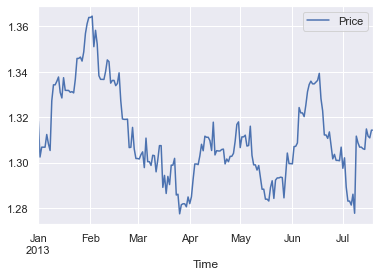

In [20]:
df2.plot()

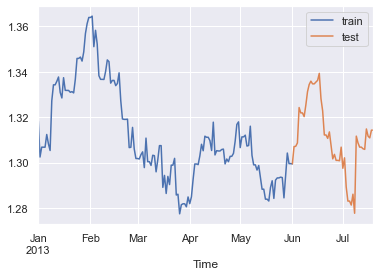

In [21]:
split_date = pd.Timestamp('2013-06-01')

train = df2.loc[:split_date]
test = df2.loc[split_date:]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [22]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [23]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [24]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

In [25]:
K.clear_session()

In [27]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/200
151/151 [==============================] - 0s 603us/step - loss: 0.1545
Epoch 2/200
151/151 [==============================] - 0s 543us/step - loss: 0.0768
Epoch 3/200
151/151 [==============================] - 0s 521us/step - loss: 0.0478
Epoch 4/200
151/151 [==============================] - 0s 522us/step - loss: 0.0382
Epoch 5/200
151/151 [==============================] - 0s 516us/step - loss: 0.0331
Epoch 6/200
151/151 [==============================] - 0s 504us/step - loss: 0.0288
Epoch 7/200
151/151 [==============================] - 0s 550us/step - loss: 0.0247
Epoch 8/200
151/151 [==============================] - 0s 557us/step - loss: 0.0208
Epoch 9/200
151/151 [==============================] - 0s 543us/step - loss: 0.0172
Epoch 10/200
151/151 [==============================] - 0s 572us/step - loss: 0.0141
Epoch 11/200
151/151 [==============================] - 0s 656us/step - loss: 0.0115
Epoch 12/200
151/151 [==============================] - 0s 570us/step - lo

In [28]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_ann)))
r2_train = r2_score(y_train, y_train_pred_ann)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_ann)))
r2_test = r2_score(y_test, y_pred_test_ann)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

The R2 score on the Train set is:	0.910
The Adjusted R2 score on the Train set is:	0.909

The R2 score on the Test set is:	0.803
The Adjusted R2 score on the Test set is:	0.799


In [29]:
model.save('ANN_NonShift.h5')

In [30]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [31]:
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(7, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

Epoch 1/200
151/151 [==============================] - 0s 966us/step - loss: 0.1185
Epoch 2/200
151/151 [==============================] - 0s 925us/step - loss: 0.0623
Epoch 3/200
151/151 [==============================] - 0s 940us/step - loss: 0.0403
Epoch 4/200
151/151 [==============================] - 0s 775us/step - loss: 0.0319
Epoch 5/200
151/151 [==============================] - 0s 820us/step - loss: 0.0264
Epoch 6/200
151/151 [==============================] - 0s 808us/step - loss: 0.0218
Epoch 7/200
151/151 [==============================] - 0s 914us/step - loss: 0.0177 0s - loss: 0.021
Epoch 8/200
151/151 [==============================] - 0s 728us/step - loss: 0.0142
Epoch 9/200
151/151 [==============================] - 0s 713us/step - loss: 0.0115
Epoch 10/200
151/151 [==============================] - 0s 728us/step - loss: 0.0093
Epoch 11/200
151/151 [==============================] - 0s 722us/step - loss: 0.0078
Epoch 12/200
151/151 [==============================] - 0

In [32]:
model_lstm.save('LSTM_NonShift.h5')

In [33]:

model_ann = load_model('ANN_NonShift.h5')
model_lstm = load_model('LSTM_NonShift.h5')

In [34]:
score_ann= model_ann.evaluate(X_test, y_test, batch_size=1)
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

48/48 [==============================] - 0s 583us/step - loss: 0.0061


In [35]:
print('ANN: %f'%score_ann)
print('LSTM: %f'%score_lstm)


ANN: 0.006176
LSTM: 0.006126


In [36]:

y_pred_test_ANN = model_ann.predict(X_test)
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

In [37]:
col1 = pd.DataFrame(y_test, columns=['True'])
col2 = pd.DataFrame(y_pred_test_ANN, columns=['ANN_prediction'])
col3 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])
col4 = pd.DataFrame(history.history['loss'], columns=['Loss_ANN'])
col5 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3, col4, col5], axis=1)
results.to_excel('PredictionResults_ANN-LSTM_NonShift.xlsx')

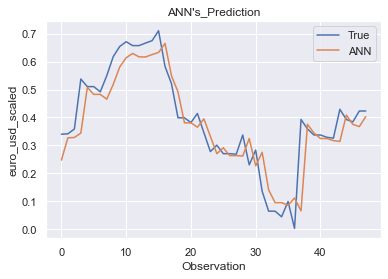

In [38]:

plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

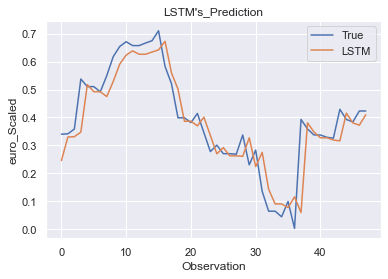

In [39]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_Scaled')
plt.legend()
plt.show()